### 1.	Write a python program (not a Jupyter notebook, but a py file you run from the command line) that accepts the cats_txt.txt file as input and counts the frequency of all words and punctuation in that text file, ordered by frequency. Make sure to handle capital and lowercase versions of words and count them together.

### 2.	Document how to run the program you created in question 1 in a readme.md file in your repo. Be as clear as possible. Use proper markdown, and consider using screenshots. Be sure to briefly discuss why this kind of exercise might be helpful for NLP in your markdown. 

### 3.	Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK.* https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a histogram. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” (“thus” and single letters, etc.) that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization.

In [1]:
import nltk
import ssl
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

lost_paradise = gutenberg.words("milton-paradise.txt")
print(lost_paradise[:20])

['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']', 'Book', 'I', 'Of', 'Man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit']


In [2]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

tokens = [w.lower() for w in lost_paradise if w.isalpha()]

# discard stopwords
no_stops = [t for t in tokens if t not in stopwords.words('english')]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
counter = Counter(lemmatized)

# Print the 10 most common tokens
print(counter.most_common(20))

[('heaven', 436), ('thou', 432), ('thy', 414), ('thee', 358), ('thus', 318), ('god', 316), ('shall', 283), ('yet', 228), ('earth', 217), ('though', 217), ('u', 187), ('man', 176), ('first', 175), ('day', 157), ('high', 153), ('one', 142), ('son', 132), ('far', 129), ('death', 127), ('may', 126)]


Looks like we are still left with a few stopwords. Maybe this version of english has some, that are not in a modern list, so will just filter them manually.

In [3]:
mystops = ['thou','thy', 'thee', 'may', 'thus', 'shall', 'though', 'u', 'yet', 'one', 'till']

In [4]:
nostops = [t for t in lemmatized if t not in mystops and len(t) > 2] # words shorter than 3 are likely stopwords

# Create the bag-of-words: bow
counter = Counter(nostops)

# Print the 10 most common tokens
print(counter.most_common(20))

[('heaven', 436), ('god', 316), ('earth', 217), ('man', 176), ('first', 175), ('day', 157), ('high', 153), ('son', 132), ('far', 129), ('death', 127), ('power', 125), ('great', 123), ('like', 120), ('world', 119), ('hell', 119), ('thing', 116), ('light', 116), ('hath', 113), ('angel', 111), ('stood', 110)]


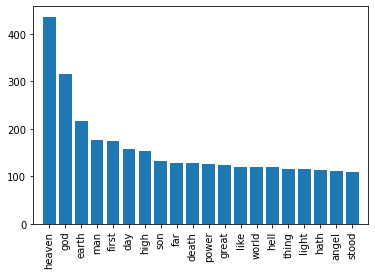

In [5]:
import numpy as np
import matplotlib.pyplot as plt

most_commons = counter.most_common(20)

# sort in-place from highest to lowest
most_commons.sort(key=lambda x: x[1], reverse=True) 

# save the names and their respective scores separately
# reverse the tuples to go from most frequent to least frequent 
words = list(zip(*most_commons))[0]
counts = list(zip(*most_commons))[1]
x_pos = np.arange(1, len(words)+1) 


fig, ax = plt.subplots()
ax.bar(x_pos, counts, width=0.8, align='center')
ax.set(xticks=range(1, len(words)+1), xlim=[0, len(words)+1])
ax.set_xticklabels(words, rotation = 90)

plt.show()

### 4.	Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost*. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run. 

In [10]:
lost_paradise = gutenberg.sents("milton-paradise.txt")
print(lost_paradise[:2])
print(lost_paradise[-2:])

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I']]
[['They', ',', 'looking', 'back', ',', 'all', 'the', 'eastern', 'side', 'beheld', 'Of', 'Paradise', ',', 'so', 'late', 'their', 'happy', 'seat', ',', 'Waved', 'over', 'by', 'that', 'flaming', 'brand', ';', 'the', 'gate', 'With', 'dreadful', 'faces', 'thronged', ',', 'and', 'fiery', 'arms', ':', 'Some', 'natural', 'tears', 'they', 'dropt', ',', 'but', 'wiped', 'them', 'soon', ';', 'The', 'world', 'was', 'all', 'before', 'them', ',', 'where', 'to', 'choose', 'Their', 'place', 'of', 'rest', ',', 'and', 'Providence', 'their', 'guide', ':', 'They', ',', 'hand', 'in', 'hand', ',', 'with', 'wandering', 'steps', 'and', 'slow', ',', 'Through', 'Eden', 'took', 'their', 'solitary', 'way', '.'], ['[', 'The', 'End', ']\x1a\x1a']]


In [12]:
# drop the title and the 'the end'
sentences = lost_paradise[1:-1]
print(sentences[1])
print(sentences[-1])

['Of', 'Man', "'", 's', 'first', 'disobedience', ',', 'and', 'the', 'fruit', 'Of', 'that', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'into', 'the', 'World', ',', 'and', 'all', 'our', 'woe', ',', 'With', 'loss', 'of', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'and', 'regain', 'the', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', 'that', ',', 'on', 'the', 'secret', 'top', 'Of', 'Oreb', ',', 'or', 'of', 'Sinai', ',', 'didst', 'inspire', 'That', 'shepherd', 'who', 'first', 'taught', 'the', 'chosen', 'seed', 'In', 'the', 'beginning', 'how', 'the', 'heavens', 'and', 'earth', 'Rose', 'out', 'of', 'Chaos', ':', 'or', ',', 'if', 'Sion', 'hill', 'Delight', 'thee', 'more', ',', 'and', 'Siloa', "'", 's', 'brook', 'that', 'flowed', 'Fast', 'by', 'the', 'oracle', 'of', 'God', ',', 'I', 'thence', 'Invoke', 'thy', 'aid', 'to', 'my', 'adventurous', 'song', ',', 'That', 'with', 'no', 'middle', 'flight', 'intends', 'to', 'soar', 'Above'

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

rows_dict = {} # will collect the results here
    
def textsent_scores(sentences):
    for i, sent in enumerate(sentences):
        sentence = ' '.join(sent)
        sid = SentimentIntensityAnalyzer() # SentimentIntensityAnalyzer object
        sentiment_dict = sid.polarity_scores(sentence) # polarity_scores method of SentimentIntensityAnalyzer
        rows_dict[i] = sentiment_dict['compound']
        
textsent_scores(sentences)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\balazs.varga\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [38]:
rows_dict

{0: 0.0,
 1: 0.8885,
 2: 0.7331,
 3: 0.8689,
 4: -0.3612,
 5: 0.6808,
 6: -0.6908,
 7: -0.5994,
 8: -0.8047,
 9: -0.7783,
 10: -0.961,
 11: 0.4939,
 12: 0.0,
 13: -0.7096,
 14: -0.6239,
 15: 0.8502,
 16: -0.9136,
 17: -0.3182,
 18: -0.2354,
 19: 0.5423,
 20: 0.9743,
 21: 0.4588,
 22: -0.9549,
 23: 0.0,
 24: 0.5574,
 25: -0.8378,
 26: 0.0,
 27: -0.4588,
 28: -0.8519,
 29: -0.6808,
 30: -0.8991,
 31: 0.4939,
 32: 0.0,
 33: -0.6617,
 34: -0.128,
 35: -0.9382,
 36: 0.0,
 37: 0.4939,
 38: -0.6767,
 39: 0.8316,
 40: 0.8268,
 41: -0.5707,
 42: 0.1511,
 43: -0.6808,
 44: -0.5574,
 45: 0.5106,
 46: 0.128,
 47: -0.6114,
 48: 0.3054,
 49: -0.7879,
 50: -0.3612,
 51: 0.5106,
 52: -0.218,
 53: -0.7783,
 54: 0.296,
 55: -0.5983,
 56: 0.7184,
 57: 0.8658,
 58: -0.4199,
 59: -0.2263,
 60: 0.1818,
 61: -0.4404,
 62: 0.9393,
 63: 0.8689,
 64: 0.5106,
 65: -0.4588,
 66: -0.9217,
 67: 0.5267,
 68: 0.5859,
 69: -0.8625,
 70: -0.8658,
 71: 0.0,
 72: 0.9343,
 73: -0.6705,
 74: 0.6705,
 75: 0.8176,
 76: -0.67

In [40]:
import pandas as pd
sentiments_df = pd.DataFrame.from_dict(rows_dict, orient = 'index', columns = ['Sentiment Score'])

sentiments_df.head()

,Sentiment Score
0,0.0000
1,0.8885
2,0.7331
3,0.8689
4,-0.3612


In [41]:
# sort the results and find most positive and most negative sentence indeces

sortd_df = sentiments_df.sort_values('Sentiment Score')
best_5 = sortd_df[-5:]
worst_5 = sortd_df[:5]

In [60]:
# print them

for i in list(best_5.index):
    print(' '.join(sentences[i]))

Mine eyes he closed , but open left the cell Of fancy , my internal sight ; by which , Abstract as in a trance , methought I saw , Though sleeping , where I lay , and saw the shape Still glorious before whom awake I stood : Who stooping opened my left side , and took From thence a rib , with cordial spirits warm , And life - blood streaming fresh ; wide was the wound , But suddenly with flesh filled up and healed : The rib he formed and fashioned with his hands ; Under his forming hands a creature grew , Man - like , but different sex ; so lovely fair , That what seemed fair in all the world , seemed now Mean , or in her summed up , in her contained And in her looks ; which from that time infused Sweetness into my heart , unfelt before , And into all things from her air inspired The spirit of love and amorous delight .
This having learned , thou hast attained the sum Of wisdom ; hope no higher , though all the stars Thou knewest by name , and all the ethereal powers , All secrets of th

In [61]:
for i in list(worst_5.index):
    print(' '.join(sentences[i]))

that now , While time was , our first parents had been warned The coming of their secret foe , and ' scaped , Haply so ' scaped his mortal snare : For now Satan , now first inflamed with rage , came down , The tempter ere the accuser of mankind , To wreak on innocent frail Man his loss Of that first battle , and his flight to Hell : Yet , not rejoicing in his speed , though bold Far off and fearless , nor with cause to boast , Begins his dire attempt ; which nigh the birth Now rolling boils in his tumultuous breast , And like a devilish engine back recoils Upon himself ; horrour and doubt distract His troubled thoughts , and from the bottom stir The Hell within him ; for within him Hell He brings , and round about him , nor from Hell One step , no more than from himself , can fly By change of place : Now conscience wakes despair , That slumbered ; wakes the bitter memory Of what he was , what is , and what must be Worse ; of worse deeds worse sufferings must ensue .
For this he shall l

In [64]:
# for the neutrals, easiest will be going through the absolute values:

sentiments_df['Absolute'] = abs(sentiments_df['Sentiment Score'])
absolute_sorted = sentiments_df.sort_values('Absolute')

absolute_sorted.head()

,Sentiment Score,Absolute
0,0.0,0.0
996,0.0,0.0
1006,0.0,0.0
1007,0.0,0.0
1013,0.0,0.0


In [65]:
for i in list(absolute_sorted[:5].index):
    print(' '.join(sentences[i]))

Book I
Be fruitful , multiply , and in the seas , And lakes , and running streams , the waters fill ; And let the fowl be multiplied , on the Earth .
thus to his Son audibly spake .
Let us make now Man in our image , Man In our similitude , and let them rule Over the fish and fowl of sea and air , Beast of the field , and over all the Earth , And every creeping thing that creeps the ground .
Open , ye everlasting gates !


### 5.	Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not.

While the sentiment analysis altogether seem to be working (albeit I do not understand much of this language) and the most negative sentences are indeed negative, the most positive are indeed positive and the neutral are neutral, it appears that punctuation in the 17th centory worked a bit different from today: many of the 'sentences' would be multiple sentences today.

If the particular scores are correct and if most negative are most negative indeed, that would require reading the whole book in a translation to English.

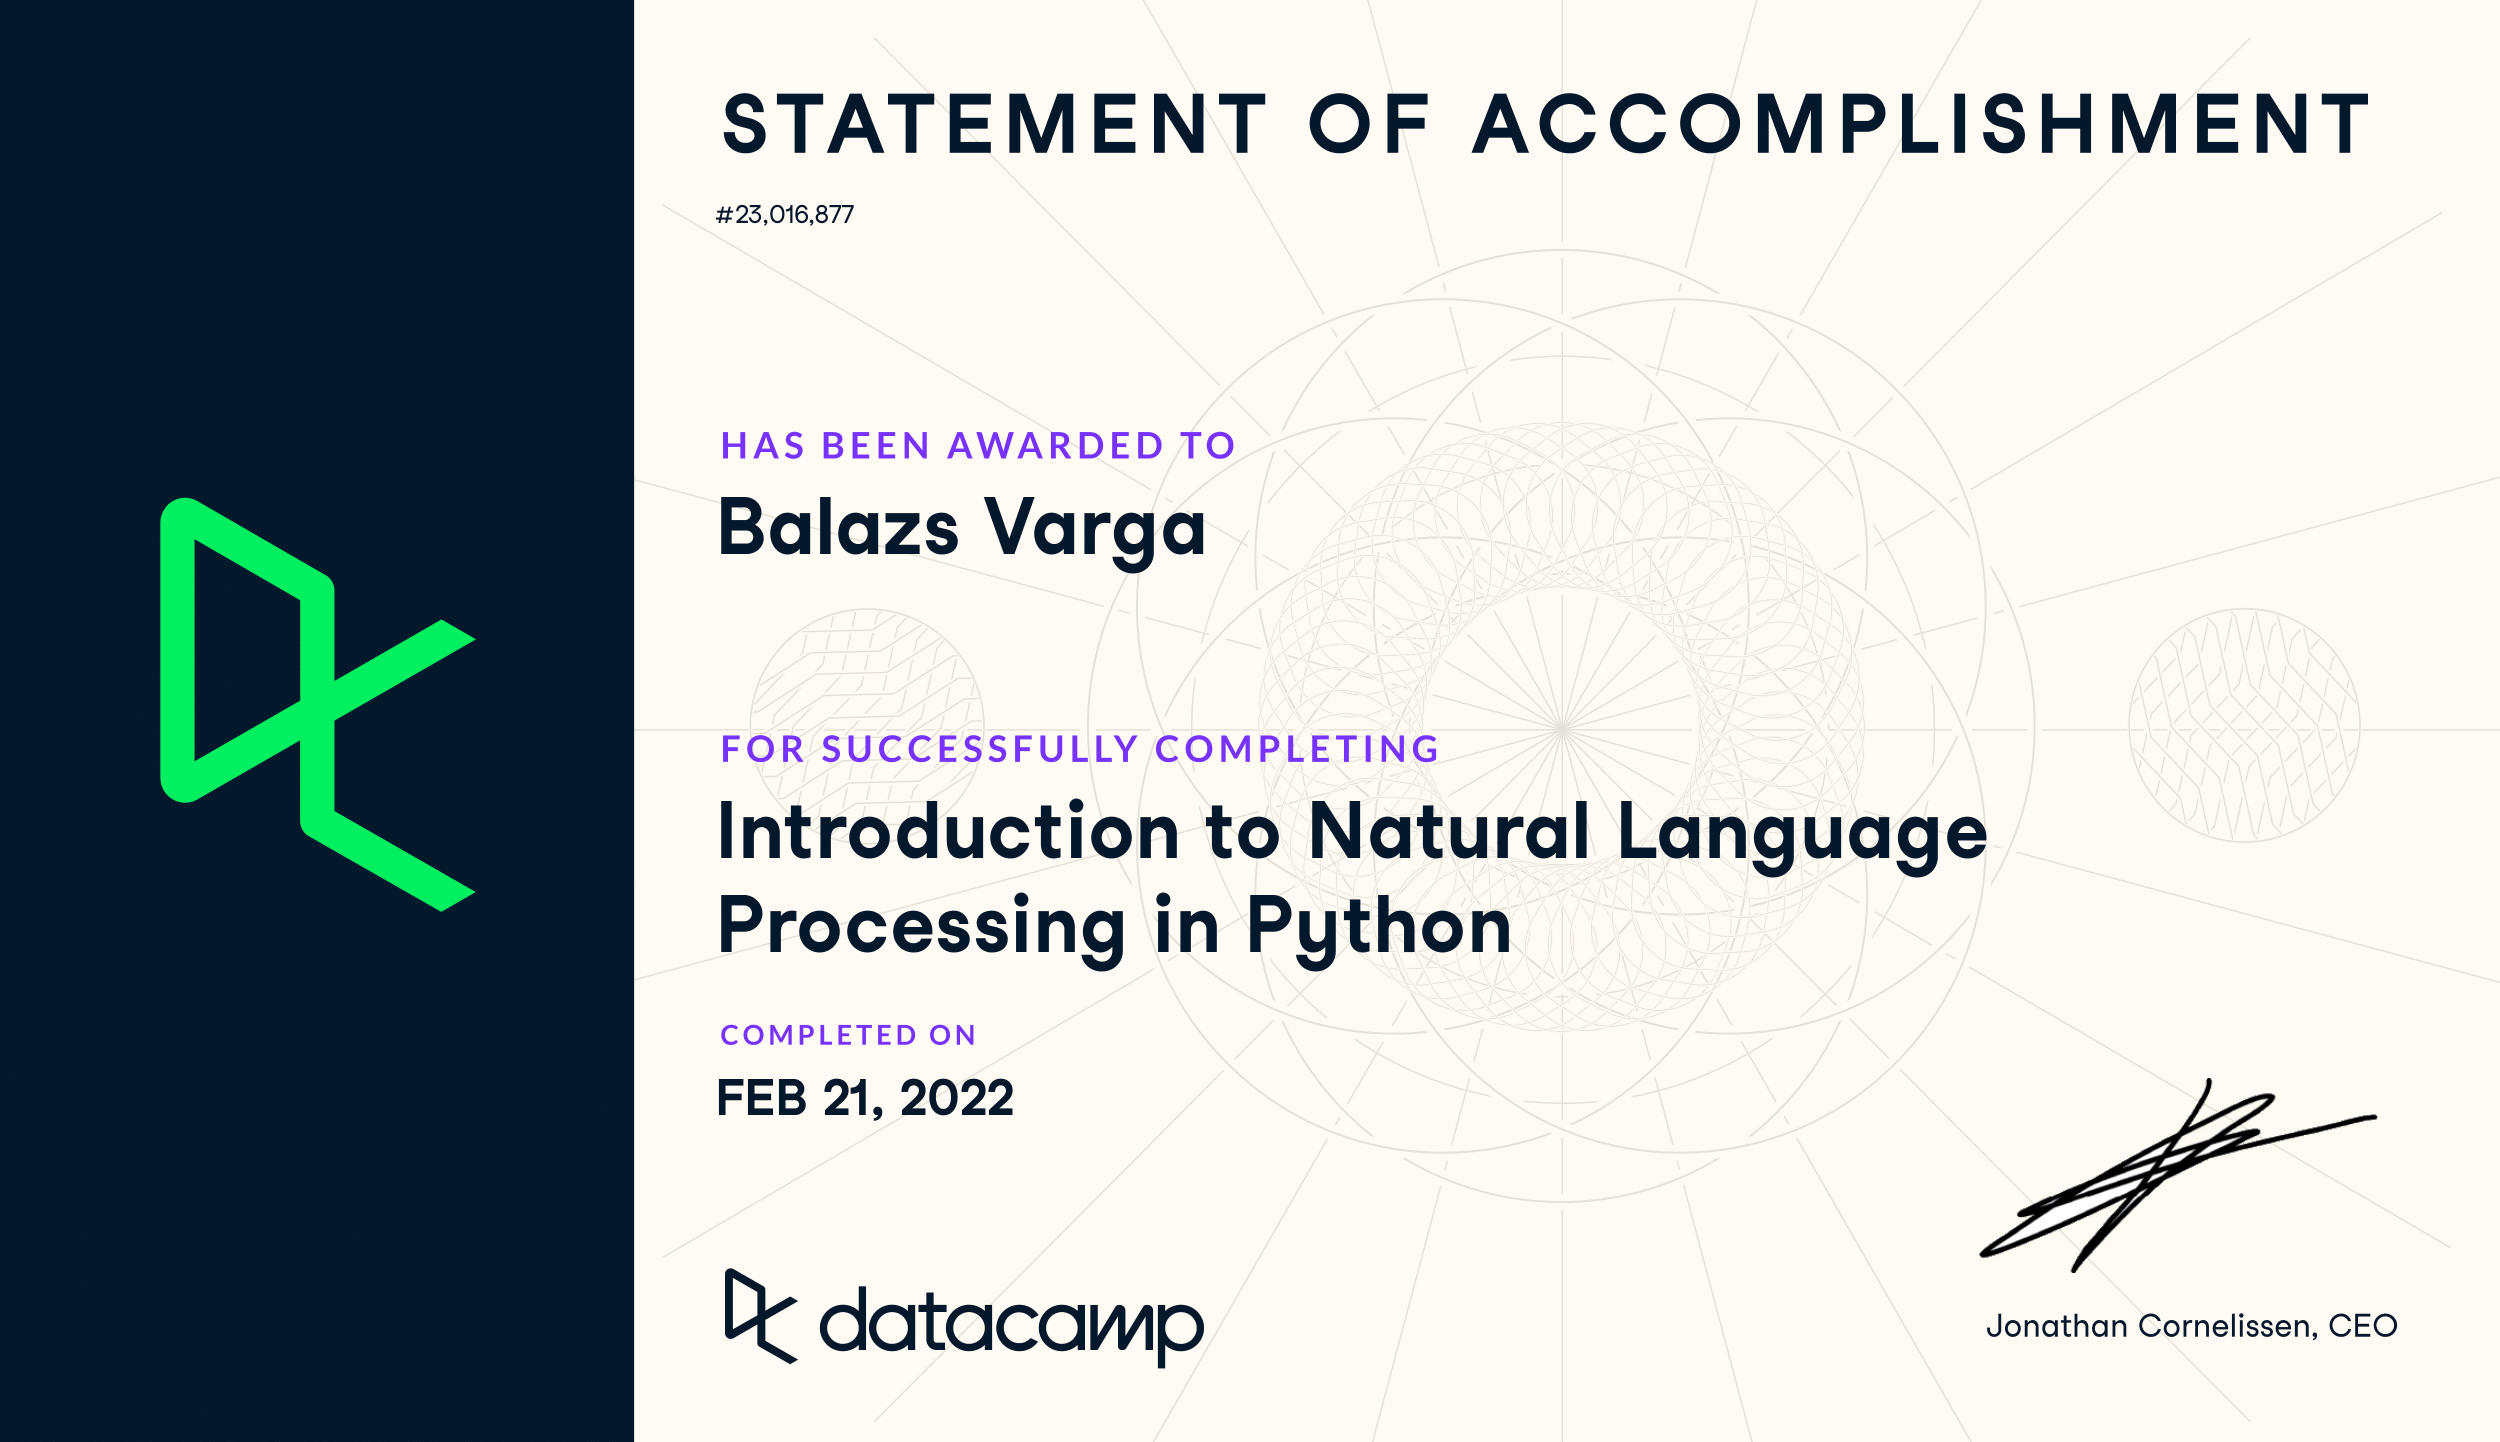